Implement Random Forest
<br>
Implement Ensemble learning for any 3 classifiers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Simple data preparation
# Prepare features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data prepared successfully!")

Training set: (614, 8)
Test set: (154, 8)
Data prepared successfully!


In [4]:
# 3 Classifiers: Random Forest, AdaBoost (boosting), Bagging (bootstrap)
print("THREE ENSEMBLE MODELS: RandomForest, AdaBoost, Bagging")

# 1. Random Forest (default parameters)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 2. AdaBoost (default parameters)
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

# 3. BaggingClassifier (bootstrap-based ensemble)
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_accuracy = accuracy_score(y_test, bag_pred)

print(f"Bagging (Bootstrap) Accuracy: {bag_accuracy:.4f}")

THREE ENSEMBLE MODELS: RandomForest, AdaBoost, Bagging
Random Forest Accuracy: 0.7208
AdaBoost Accuracy: 0.7792
Bagging (Bootstrap) Accuracy: 0.7013
AdaBoost Accuracy: 0.7792
Bagging (Bootstrap) Accuracy: 0.7013


In [5]:
# Performance Comparison
print("\nPERFORMANCE COMPARISON")

models_data = []

# Random Forest metrics
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
models_data.append({
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
})

# AdaBoost metrics
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
models_data.append({
    'Model': 'AdaBoost',
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1
})

# Bagging metrics
bag_precision = precision_score(y_test, bag_pred)
bag_recall = recall_score(y_test, bag_pred)
bag_f1 = f1_score(y_test, bag_pred)
models_data.append({
    'Model': 'Bagging (Bootstrap)',
    'Accuracy': bag_accuracy,
    'Precision': bag_precision,
    'Recall': bag_recall,
    'F1-Score': bag_f1
})

# Create comparison DataFrame
comparison_df = pd.DataFrame(models_data)

print("\nPerformance Metrics:")
print(comparison_df.round(4).to_string(index=False))


PERFORMANCE COMPARISON

Performance Metrics:
              Model  Accuracy  Precision  Recall  F1-Score
      Random Forest    0.7208     0.6071  0.6182    0.6126
           AdaBoost    0.7792     0.6780  0.7273    0.7018
Bagging (Bootstrap)    0.7013     0.5818  0.5818    0.5818


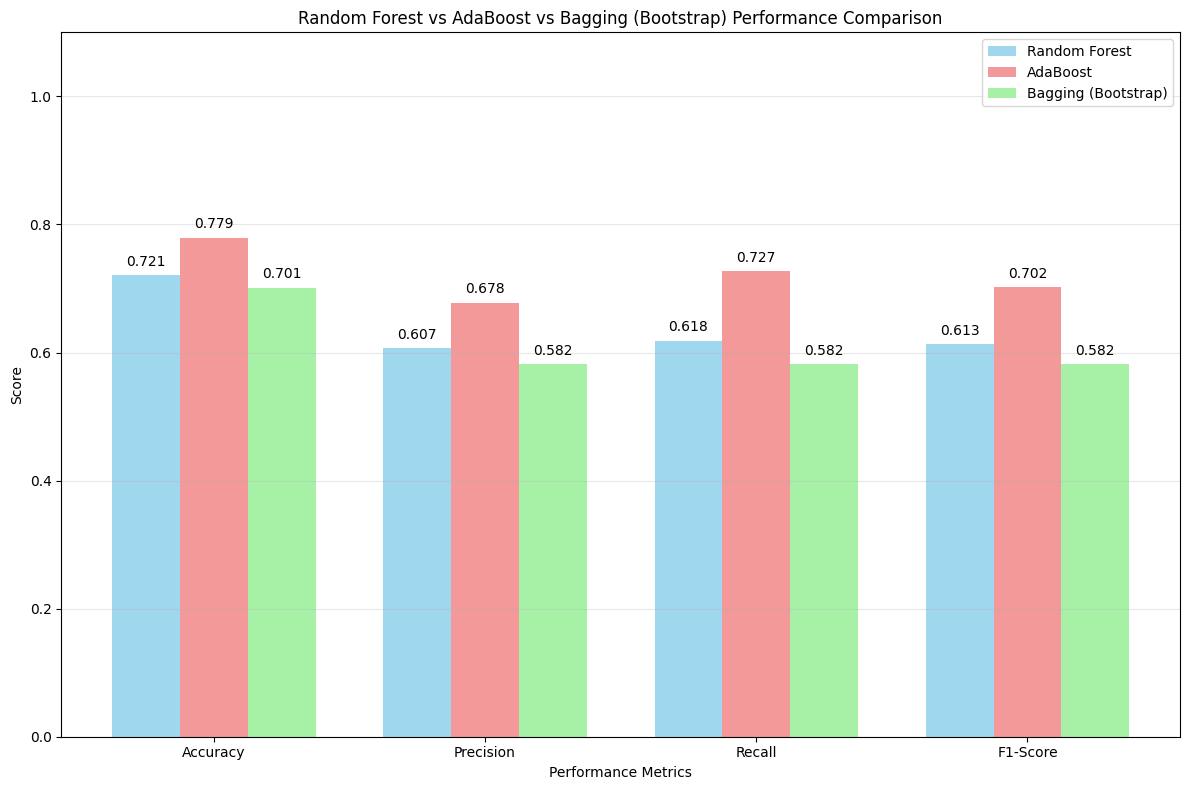

In [6]:
# Performance Visualization
plt.figure(figsize=(12, 8))

models = comparison_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen']

x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models):
    values = [comparison_df.iloc[i][metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model, color=colors[i], alpha=0.8)
    for j, v in enumerate(values):
        plt.text(x[j] + i*width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Random Forest vs AdaBoost vs Bagging (Bootstrap) Performance Comparison')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Inference

After evaluating Random Forest, AdaBoost, and Bagging (bootstrap) on the diabetes dataset:

- Random Forest provides robust predictions by averaging many decision trees and typically reduces variance.
- AdaBoost (boosting) focuses on hard examples and often improves recall and F1 by combining weak learners.
- Bagging (bootstrap) reduces variance by training base estimators on bootstrap samples and aggregating their predictions.

Boosting is by far the best model for this dataset